### 累乗近似でad値と壁からの距離を算出する関数を推定



In [80]:
%matplotlib inline
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
import math

def target_func(x, a, b):
    return a * x**b

[ 0.97343693 -0.40873802]


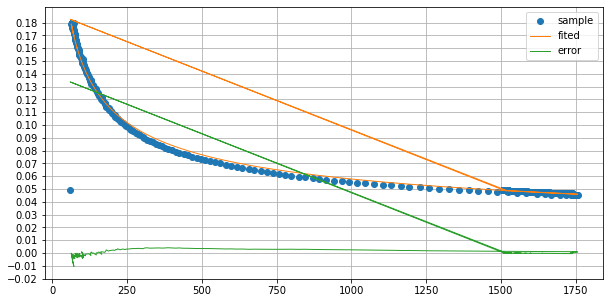

In [81]:
##########################
x = ad_la
y = dist_from_wall

p_opt, cov = curve_fit(target_func, x, y, maxfev=500000)
print(p_opt)

y_fit = np.vectorize(target_func)

plt.figure(figsize=(10,5))
plt.grid()
plt.yticks( [-0.02,-0.01,0.0,0.01,0.02,0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18] )
plt.plot(x,y,lw=0,marker='o',clip_on=False, label="sample")
plt.plot(x,y_fit(x, *p_opt),lw=1, label="fited")
plt.plot(x,y_fit(x, *p_opt)-y,lw=1, label="error")
plt.legend()
plt.show()

[ 0.74718993 -0.36178926]


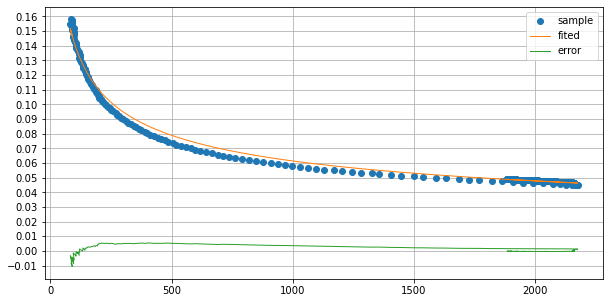

In [87]:
##########################
x = ad_ra[60:-1]
y = dist_from_wall[60:-1]

p_opt, cov = curve_fit(target_func, x, y, maxfev=100000)
print(p_opt)

y_fit = np.vectorize(target_func)

plt.figure(figsize=(10,5))
plt.grid()
plt.yticks( [-0.02,-0.01,0.0,0.01,0.02,0.03,0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18] )
plt.plot(x,y,lw=0,marker='o',clip_on=False, label="sample")
plt.plot(x,y_fit(x,*p_opt),lw=1, label="fited")
plt.plot(x,y_fit(x,*p_opt)-y,lw=1, label="error")

plt.legend()
plt.show()



In [5]:
# dist_from_wall 2022/02/03

dist_from_wall = np.array([
0.17999964,
0.17999964,
0.17999928,
0.17999694,
0.17998524,
0.17997129,
0.17994591,
0.17991153,
0.17986572,
0.1798101,
0.17974134,
0.17965926,
0.17955864,
0.17943876,
0.17929917,
0.17914032,
0.17896293,
0.178767,
0.17855478,
0.17832672,
0.17808318,
0.1778211,
0.1775412,
0.17724807,
0.17694018,
0.17662059,
0.17629047,
0.17595,
0.17559828,
0.17523369,
0.17485776,
0.17447085,
0.17407179,
0.17366148,
0.17324091,
0.17281044,
0.1723698,
0.17191827,
0.17145603,
0.17098326,
0.17049348,
0.16998822,
0.16946928,
0.16894206,
0.16840044,
0.16784631,
0.16728318,
0.16670223,
0.16610922,
0.16550145,
0.16487964,
0.16424685,
0.16359669,
0.16293672,
0.16226649,
0.16158195,
0.16088985,
0.16018713,
0.15947154,
0.15874416,
0.15800931,
0.1572714,
0.15652368,
0.15576615,
0.15500322,
0.15422823,
0.15344613,
0.15265224,
0.15184134,
0.15102171,
0.15018552,
0.14933106,
0.14845932,
0.14756445,
0.14665104,
0.14571756,
0.14476752,
0.14380191,
0.14281479,
0.14181174,
0.14079393,
0.13976937,
0.1387323,
0.13768533,
0.13663044,
0.13556691,
0.13450419,
0.13344174,
0.13238343,
0.13132593,
0.13027113,
0.12921354,
0.12815568,
0.12709701,
0.12603195,
0.12496725,
0.12389841,
0.12282849,
0.12175434,
0.12067713,
0.1195947,
0.11850498,
0.11740851,
0.11630637,
0.11520351,
0.11410101,
0.11300076,
0.11190771,
0.11082222,
0.10974465,
0.10867545,
0.10761408,
0.10656414,
0.10552293,
0.10449306,
0.10346544,
0.1024389,
0.10141578,
0.10039086,
0.09936054,
0.09832464,
0.09727956,
0.09622665,
0.09516339,
0.09408888,
0.09300456,
0.09191412,
0.09082296,
0.08972649,
0.08863344,
0.08754678,
0.0864666,
0.08539092,
0.08432541,
0.08327214,
0.08223201,
0.08120547,
0.08019495,
0.0791991,
0.07821792,
0.07725042,
0.07629507,
0.0753552,
0.07442325,
0.07350723,
0.07260174,
0.07171029,
0.07082604,
0.06995124,
0.06908247,
0.06822657,
0.06738354,
0.06655032,
0.06572961,
0.06492096,
0.06412518,
0.06334497,
0.0625851,
0.06184422,
0.06112296,
0.06042096,
0.05973948,
0.05907753,
0.05843916,
0.05782563,
0.05722767,
0.05663961,
0.0560673,
0.05550606,
0.05495724,
0.05441796,
0.05388696,
0.05336424,
0.052848,
0.0523404,
0.05184189,
0.05135058,
0.05086917,
0.05039559,
0.04993344,
0.04948227,
0.04904199,
0.04861494,
0.04820382,
0.04780404,
0.04741866,
0.04704687,
0.04669173,
0.04635135,
0.04602528,
0.0457182,
0.04546629,
0.04527459,
0.04514481,
0.04509306,
0.04509261,
0.04509945,
0.04511385,
0.04514526,
0.04518873,
0.04524354,
0.04530789,
0.04537863,
0.04545612,
0.04553631,
0.04561803,
0.04569858,
0.04577724,
0.04585059,
0.04591944,
0.04598379,
0.04604193,
0.04609602,
0.04614408,
0.04618872,
0.0462303,
0.04626855,
0.0463041,
0.04633812,
0.04636953,
0.04639905,
0.04642623,
0.04645125,
0.04647357,
0.04649472,
0.04651515,
0.04653369,
0.04655223,
0.04656807,
0.046584,
0.04659948,
0.04661379,
0.04662819,
0.04664142,
0.04665546,
0.04666941,
0.046683,
0.04669587,
0.04671027,
0.04672458,
0.04673709,
0.04675032,
0.04676355,
0.04677597,
0.04679001,
0.04680396,
0.04681719,
0.04683042,
0.04684365,
0.04685733,
0.04687164,
0.0468864,
0.0469008,
0.04691511,
0.04693023,
0.04694544,
0.04696164,
0.04697676,
0.04699188,
0.04700781,
0.04702365,
0.04703886,
0.04705434,
0.0470691,
0.04708458,
0.04709817,
0.0471114,
0.04712427,
0.04713642,
0.04714776,
0.0471591,
0.04716819,
0.04717836,
0.04718745,
0.04719618,
0.04720482,
0.04721355,
0.04722147,
0.0472302,
0.04723893,
0.04724838,
0.04725819,
0.04726845,
0.04727934,
0.04729185,
0.04730472,
0.04731831,
0.04733307,
0.04734747,
0.04736223,
0.04737699,
0.04739175,
0.04740687,
0.04742199,
0.04743675,
0.04745187,
0.04746699,
0.04748139,
0.04749615,
0.04751091,
0.0475245,
0.04753692,
0.04754871,
0.04756077,
0.04757292,
0.0475839,
0.04759524,
0.04760577,
0.04761639,
0.04762665,
0.04763718,
0.0476478,
0.0476595,
0.04767084,
0.04768254,
0.04769388,
0.04770567,
0.04771737,
0.04772871,
0.0477405,
0.04775256,
0.04776426,
0.04777641,
0.04778775,
0.04779909,
0.04781115,
0.04782249,
0.04783536,
0.04784742,
0.04785876,
0.04787055,
0.04788225,
0.04789395,
0.04790574,
0.04791852,
0.04792986,
0.04794165,
0.04795371,
0.04796469,
0.04797531,
0.04798665,
0.04799799,
0.04800897,
0.0480195,
0.04803012,
0.04803993,
0.0480501,
0.04805847,
0.04806828,
0.04807665,
0.04808385,
0.04808988,
0.04809708,
0.04810275,
0.04810761,
0.0481122,
0.04811706,
0.04812201,
0.04812732,
0.04813146,
0.04813605,
0.04813983,
0.04814397,
0.04814775,
0.04815225,
0.04815639,
0.04816134,
0.04816629,
0.04817232,
0.04817871,
0.04818627,
0.04819311,
0.04820139,
0.04820859,
0.04821732,
0.04822488,
0.0482328,
0.04824036,
0.04824828,
0.04825512,
0.04826304,
0.04826943,
0.04827627,
0.0482823,
0.04828842,
0.048294,
0.04829778,
0.04830237,
0.04830543,
0.04830804,
0.04831146,
0.04831371,
0.04831596,
0.04831821,
0.04832019,
0.04832244,
0.04832433,
0.04832694,
0.04832964,
0.04833342,
0.04833567,
0.04833873,
0.04834215,
0.04834593,
0.04834971,
0.04835385,
0.04835763,
0.04836258,
0.04836672,
0.04837086,
0.04837428,
0.04837806,
0.04838148,
0.04838454,
0.04838787,
0.04839174,
0.04839552,
0.04840002,
0.04840344,
0.04840758,
0.04841172,
0.04841703,
0.04842045,
0.04842576,
0.04842954,
0.04843332,
0.04843746,
0.04844124,
0.04844538,
0.0484488,
0.04845186,
0.04845492,
0.04845798,
0.0484614,
0.04846401,
0.04846671,
0.04847004,
0.04847382,
0.04847724,
0.04848066,
0.0484848,
0.04848903,
0.04849353,
0.04849884,
0.04850415,
0.04851018,
0.04851621,
0.04852233,
0.04852944,
0.04853556,
0.04854348,
0.04855104,
0.0485586,
0.04856652,
0.04857408,
0.04858128,
0.04858731,
0.04859298,
0.04859829,
0.04860207,
0.04860513,
0.04860819,
0.04861008,
0.04861161,
0.04861269,
0.0486135,
0.04861386,
0.04861386,
0.04861494,
0.04861647,
0.04861647,
0.04861728,
0.048618,
0.04861908,
0.04862061,
0.04862142,
0.0486225,
0.04862322,
0.04862475,
0.04862592,
0.04862817,
0.04863006,
0.04863267,
0.04863456,
0.04863654,
0.04863915,
0.04864032,
0.04864176,
0.04864329,
0.04864518,
0.04864707,
0.0486486,
0.04865013,
0.0486513,
0.04865274,
0.04865391,
0.0486558,
0.04865697,
0.04865733,
0.04865886,
0.04865994,
0.04866147,
0.048663,
0.04866444,
0.04866678,
0.04866867,
0.04867011,
0.04867128,
0.04867389,
0.04867578,
0.04867956,
0.04868262,
0.04868604,
0.0486891,
0.04869207,
0.04869585,
0.04869927,
0.04870197,
0.04870575,
0.04870872,
0.04871367,
0.04871817,
0.04872276,
0.0487269,
0.04873104,
0.04873491,
0.04873869,
0.04874166,
0.04874544,
0.04874922,
0.04875264,
0.04875606,
0.04875948,
0.0487629,
0.04876551,
0.04876893,
0.04877235,
0.0487746,
0.04877694,
0.04877991,
0.04878405,
0.04878675,
0.04878936,
0.04879206,
0.04879314,
0.0487962,
0.04879845,
0.04880034,
0.0488034,
0.04880529,
0.04880682,
0.04880943,
0.04881096,
0.04881321,
0.04881546,
0.04881771,
0.04882077,
0.04882302,
0.04882455,
0.04882644,
0.0488295,
0.04883139,
0.048834,
0.04883706,
0.04883976,
0.04884201,
0.04884498,
0.04884732,
0.04884885,
0.04885182,
0.04885452,
0.04885677,
0.04885866,
0.04885983,
0.04886136,
0.04886244,
0.04886361,
0.04886433,
0.04886586,
0.04886775,
0.04886892,
0.04886964,
0.04887036,
0.04887153,
0.04887225,
0.0488727,
0.04887342,
0.04887459,
0.04887612,
0.04887756,
0.04887909,
0.0488799,
0.04888179,
0.04888215,
0.0488844,
0.04888557,
0.04888629,
0.04888818,
0.04888854,
0.04888935,
0.04889079,
0.04889124,
0.04889124,
0.04889196,
0.04889196,
0.04889268,
0.04889304,
0.04889385,
0.0488934,
0.0488934,
0.0488934,
0.04889385,
0.04889457,
0.04889493,
0.04889493,
0.04889493,
0.04889529,
0.04889493,
0.04889493,
0.04889493,
0.04889574,
0.04889529,
0.04889574,
0.04889574,
0.04889646,
0.04889646,
0.04889682,
0.04889682,
0.04889646,
0.04889574,
0.04889529,
0.04889493,
0.04889538,
0.04889493,
0.04889538,
0.04889574,
0.04889493,
0.04889574,
0.04889493,
0.04889529,
0.04889565,
0.04889565,
0.04889529,
0.04889646,
0.04889682,
0.04889682,
0.04889754,
0.0488979,
0.0488979,
0.04889871,
0.04889943,
0.04889943,
0.04889943,
0.04889943,
0.04889943,
0.0489006,
0.04890096,
0.04890096,
0.04890132,
0.04890213,
0.04890168,
0.04890213,
0.04890213,
0.04890321,
0.04890393,
0.04890438,
0.04890393,
0.04890393,
0.04890438,
0.04890474,
0.04890474,
0.04890474,
0.0489051,
0.0489051,
0.04890474,
0.04890546,
0.0489051,
0.04890546,
0.04890546,
0.04890582,
0.04890618,
0.04890735,
0.04890807,
0.04890771,
0.04890843,
0.04890879,
0.04890843,
0.0489096,
0.04890924,
0.04890924,
0.04890888,
0.0489096,
0.04890996,
0.0489096,
0.04890996,
0.04890996,
0.04891077,
0.04891077,
0.04891149,
0.04891221,
0.04891185,
0.04891185,
0.04891185,
0.04891221,
0.04891293,
0.04891293,
0.04891338,
0.04891338,
0.04891338,
0.04891374,
0.04891374,
0.04891374,
0.04891374,
0.04891374,
0.0489141,
0.0489141,
0.04891338,
0.04891374,
0.0489141,
0.04891374,
0.04891446,
0.04891491,
0.04891563,
0.04891635,
0.04891635,
0.04891635,
0.04891599,
0.04891716,
0.04891752,
0.04891824,
0.04891905,
0.0489186,
0.04891824,
0.04891824,
0.04891788,
0.04891788,
0.04891824,
0.04891788,
0.0489186,
0.04891905,
0.04891941,
0.04891977,
0.04892013,
0.04892049,
0.04892121,
0.04892166,
0.04892166,
0.04892202,
0.04892202,
0.04892085,
0.04892085,
0.04892202,
0.04892238,
0.04892202,
0.04892121,
0.04892121,
0.04892085,
0.04892121,
0.04892157,
0.04892157,
0.04892157,
0.04892274,
0.04892274,
0.04892274,
0.04892274,
0.04892346,
0.04892346,
0.04892391,
0.04892427,
0.04892535,
0.04892463,
0.04892463,
0.04892427,
0.04892463,
0.04892499,
0.04892463,
0.04892463,
0.04892535,
0.04892535,
0.04892499,
0.04892571,
0.04892616,
0.04892616,
0.04892652,
0.04892652,
0.04892652,
0.04892652,
0.04892688,
0.04892688,
0.04892724,
0.0489276,
0.0489276,
0.0489276,
0.04892832,
0.04892796,
0.04892877,
0.04892913,
0.04892877,
0.04892913,
0.04892949,
0.04892877,
0.04892877,
0.04892877,
0.04892832,
0.04892877,
0.04892913,
0.04892877,
0.04892949,
0.04892985,
0.04892949,
0.04892949,
0.04892913,
0.04892832,
0.04892832,
0.04892832,
0.04892832,
0.04892877,
0.04892913,
0.04892913,
0.04892949,
0.04892985,
0.04892985,
0.04892985,
0.04892949,
0.04892985,
0.04892949,
0.04892949,
0.04892949,
0.04893021,
0.04892985,
0.04893021,
0.04893057,
0.04893093,
0.04893057,
0.04893093,
0.04893138,
0.04893138,
0.04893138,
0.04893138,
0.04893174,
0.04893174,
0.04893138,
0.0489321,
0.0489321,
0.04893174,
0.04893246,
0.04893246,
0.04893246,
0.04893318,
0.04893282,
0.04893246,
0.04893246,
0.04893246,
0.04893246,
0.0489321,
0.04893246,
0.04893246,
0.04893246,
0.0489321,
0.0489321,
0.04893174,
0.04893138,
0.04893138,
0.04893174,
0.0489321,
0.0489321,
0.0489321,
0.04893246,
0.04893246,
0.04893327,
0.04893282,
0.04893327,
0.04893327,
0.04893363,
0.04893363,
0.04893399,
0.04893399,
0.04893363,
0.04893399,
0.04893399,
0.04893435,
0.04893435,
0.04893435,
0.04893435,
0.04893435,
0.04893435,
0.0489348,
0.04893516,
0.04893516,
0.04893588,
0.04893552,
0.04893552,
0.04893516,
0.04893552,
0.04893588,
0.04893552,
0.04893588,
0.04893588,
0.04893552,
0.04893588,
0.04893624,
0.04893588,
0.04893624,
0.04893624,
0.04893624,
0.04893624,
0.04893588,
0.04893588,
0.04893588,
0.0489366,
0.04893696,
0.0489366,
0.04893696,
0.04893696,
0.0489366,
0.04893696,
0.04893696,
0.04893624,
0.04893588,
0.04893624,
0.04893624,
0.04893624,
0.04893624,
0.0489366,
0.04893732,
0.04893849,
0.04893768,
0.04893732,
0.04893732,
0.04893804,
0.04893804,
0.04893849,
0.04893921,
0.04893885,
0.04893804,
0.0489384,
0.04893921,
0.04893885,
0.04893885,
0.04893885,
0.04893885,
0.0489384,
0.04893885,
0.04893921,
0.04893921,
0.04893957,
0.04893921,
0.04893957,
0.04893921,
0.04893921,
0.04893921,
0.04893921,
0.04893885,
0.04893885,
0.04893885,
0.04893921,
0.04893921,
0.04893957,
0.04893921,
0.04893993,
0.04893957,
0.04893921,
0.04893993,
0.04894065,
0.04894029,
0.04894065,
0.04894065,
0.04894065,
0.04894101,
0.04894065,
0.04894101,
0.04894101,
0.04894101,
0.04894146,
0.04894146,
0.04894146,
0.04894101,
0.04894146,
0.04894182,
0.04894182,
0.04894182,
0.04894182,
0.04894254,
0.04894182,
0.04894218,
0.04894182,
0.04894218,
0.04894146,
0.04894182,
0.04894218,
0.04894254,
0.04894254,
0.04894254,
0.04894218,
0.0489429,
0.04894254,
0.04894254,
0.04894218,
0.04894218,
0.04894182,
0.04894146,
0.04894218,
0.04894254,
0.04894218,
0.04894299,
0.04894335,
0.04894335,
0.04894371,
0.04894335,
0.04894335,
0.04894371,
0.04894299,
0.04894299,
0.04894299,
0.04894335,
0.04894407,
0.04894371,
0.04894335,
0.0489429,
0.0489429,
0.04894335,
0.04894299,
0.04894335,
0.04894371,
0.04894371,
0.04894371,
0.04894407,
0.04894371,
0.04894371,
0.04894371,
0.04894371,
0.04894407,
0.04894407,
0.04894371,
0.04894335,
0.04894335,
0.04894254,
0.04894326,
0.0489429,
0.04894218,
0.04894254,
0.0489429,
0.04894254,
0.0489429,
0.04894362,
0.04894362,
0.04894407,
0.04894362,
0.04894443,
0.04894407,
0.04894362,
0.04894407,
0.04894443,
0.04894407,
0.04894479,
0.04894407,
0.04894362,
0.04894326,
0.04894362,
0.04894407,
0.04894362,
0.04894362,
0.04894326,
0.04894362,
0.0489429,
0.04894254,
0.04894326,
0.04894362,
0.04894407,
0.04894407,
0.04894407,
0.04894443,
0.04894443,
0.04894479,
0.04894479,
0.04894407,
0.04894443,
0.04894443,
0.04894479,
0.04894479,
0.04894443,
0.04894479,
0.04894443,
0.04894515,
0.04894515,
0.04894515,
0.0489456,
0.04894479,
0.0489456,
0.04894596,
0.04894596,
0.04894596,
0.04894515,
0.04894515,
0.04894515,
0.04894596,
0.04894596,
0.04894668,
0.04894704,
0.04894668,
0.04894596,
0.04894596,
0.04894596,
0.04894632,
0.04894668,
0.04894668,
0.04894668,
0.04894632,
0.04894632,
0.04894632,
0.04894632,
0.04894632,
0.04894632,
0.04894596,
0.04894668,
0.04894632,
0.04894632,
0.04894632,
0.04894632,
0.04894596,
0.04894596,
0.04894515,
0.04894596,
0.04894551,
0.04894551,
0.04894623,
0.04894587,
0.04894515,
0.04894551,
0.04894632,
0.04894668,
0.04894623,
0.04894668,
0.0489474,
0.04894623,
0.04894623,
0.04894623,
0.04894659,
0.04894659,
0.04894704,
0.04894659,
0.04894623,
0.04894623,
0.04894668,
0.04894668,
0.04894668,
0.04894623,
0.04894668,
0.04894623,
0.04894623,
0.04894587,
0.04894668,
0.04894623,
0.04894623,
0.04894551,
0.04894587,
0.04894587,
0.04894551,
0.04894623,
0.04894623,
0.04894704,
0.04894704,
0.04894776,
0.0489474,
0.0489474,
0.0489474,
0.0489474,
0.04894812,
0.04894776,
0.04894812,
0.0489474,
0.04894857,
0.04894821,
0.04894857,
0.04894821,
0.04894857,
0.04894857,
0.04894893,
0.04894893,
0.04894821,
0.04894776,
0.04894776,
0.0489474,
0.04894704,
0.0489474,
0.0489474,
0.04894776,
0.04894776,
0.04894704,
0.04894704,
0.0489474,
0.04894668,
0.04894668,
0.04894587,
0.04894515,
0.04894515,
0.04894434,
0.04894326,
0.04894326,
0.04894326,
0.0489429,
0.04894254,
0.04894254,
0.04894173,
0.04894137,
0.04894173,
0.04894173,
0.04894173,
0.04894173,
0.04894137,
0.04894137,
0.04894173,
0.04894137,
0.04894137,
0.04894101,
0.04894173,
0.04894173,
0.04894173,
0.04894218,
0.04894182,
0.04894182,
0.04894146,
0.04894146,
0.04894182,
0.04894182,
0.04894218,
0.04894254,
0.04894254,
0.04894218,
0.04894218,
0.04894218,
0.04894182,
0.04894218,
0.04894182,
0.04894254,
0.04894218,
0.04894182,
0.04894254,
0.04894218,
0.04894182,
0.04894146,
0.04894182,
0.04894182,
0.04894218,
0.04894146,
0.04894101,
0.04894065,
0.04894146,
0.04894182,
0.04894182,
0.04894182,
0.04894146,
0.04894146,
0.04894065,
0.0489411,
0.04894182,
0.04894254,
0.04894218,
0.04894218,
0.04894218,
0.04894182,
0.04894146,
0.04894182,
0.04894146,
0.04894146,
0.04894146,
0.04894146,
0.0489411,
0.04894074,
0.04894074,
0.04894074,
0.04894074,
0.04894074,
0.04894029,
0.04894074,
0.04894074,
0.04894146,
0.04894146,
0.04894182,
0.04894263,
0.04894227,
0.04894227,
0.04894227,
0.04894182,
0.04894182,
0.04894182,
0.04894182,
0.04894182,
0.04894263,
0.04894335,
0.04894299,
0.04894263,
0.04894263,
0.04894191,
0.04894191,
0.04894146,
0.04894263,
0.04894227,
0.04894191,
0.04894227,
0.04894263,
0.04894263,
0.04894227,
0.04894227,
0.04894227,
0.04894155,
0.04894191,
0.04894191,
0.04894191,
0.04894155,
0.04894155,
0.04894155,
0.04894155,
0.04894119,
0.04894119,
0.04894119,
0.04894191,
0.04894227,
0.04894191,
0.04894227,
0.04894191,
0.04894155,
0.04894227,
0.04894263,
0.04894263,
0.04894227,
0.04894191,
0.04894155,
0.04894191,
0.04894155,
0.04894074,
0.04894074,
0.04894074,
0.04894119,
0.04894155,
0.04894074,
0.04894155,
0.04894191,
0.04894155,
0.04894191,
0.04894191,
0.04894191,
0.04894191,
0.04894155,
0.04894155,
0.04894119,
0.04894155,
0.04894191,
0.04894191,
0.04894155,
0.04894227,
0.04894263,
0.04894227,
0.04894191,
0.04894263,
0.04894227,
0.04894227,
0.04894263,
0.04894263,
0.04894227,
0.04894191,
0.04894191,
0.0489411,
0.0489411,
0.04894002,
0.04894038,
0.04894038,
0.04894002,
0.04894074,
0.0489411,
0.04894146,
0.04894191,
0.04894263,
0.04894227,
0.04894263,
0.04894335,
0.0489438,
0.04894227,
0.04894227,
0.04894227,
0.04894263,
0.04894191,
0.04894155,
0.0489411,
0.04894155,
0.04894191,
0.04894263,
0.04894263,
0.04894263,
0.04894263,
0.04894155,
0.04894227,
0.04894191,
0.04894191,
0.04894263,
0.04894227,
0.04894191,
0.04894191,
0.04894155,
0.04894155,
0.04894155,
0.04894155,
0.04894155,
0.04894191,
0.04894227,
0.04894263,
0.04894191,
0.04894227,
0.04894227,
0.04894263,
0.04894335,
0.04894299,
0.04894299,
0.04894263,
0.04894299,
0.04894227,
0.04894227,
0.04894263,
0.04894191,
0.0489411,
0.04894074,
0.04894074,
0.0489411,
0.0489411,
0.0489411,
0.04894191,
0.04894227,
0.04894227,
0.04894227,
0.04894299,
0.04894335,
0.04894335,
0.04894299,
0.04894371,
0.04894299,
0.04894299,
0.04894299,
0.04894299,
0.04894263,
0.04894227,
0.04894182,
0.04894146,
0.04894227,
0.04894227,
0.04894182,
0.0489411,
0.04894146,
0.0489411,
0.04894074,
0.04894038,
0.04894038,
0.0489411,
0.04894146,
0.0489411,
0.04894182,
0.04894227,
0.04894182,
0.04894218,
0.04894263,
0.04894263,
0.04894218,
0.04894218,
0.04894263,
0.04894299,
0.04894263,
0.04894299,
0.04894182,
0.04894218,
0.04894182,
0.04894182,
0.0489411,
0.0489411,
0.04894074,
0.04894029,
0.04894074,
0.04894029,
0.0489411,
0.04894065,
0.0489411,
0.0489411,
0.0489411,
0.0489411,
0.04894146,
0.04894182,
0.04894182,
0.04894146,
0.0489411,
0.04894074,
0.04894029,
0.0489411,
0.04894074,
0.04894074,
0.0489411,
0.0489411,
0.04894146,
0.04894182,
0.0489411,
0.04894182,
0.04894182,
0.04894218
])

In [9]:
# ad_la 2022/02/04

ad_la = np.array([
67,
72,
66,
67,
66,
66,
66,
66,
65,
65,
64,
65,
64,
65,
65,
63,
65,
66,
65,
66,
67,
66,
66,
69,
66,
68,
67,
67,
68,
69,
68,
70,
71,
71,
72,
72,
72,
71,
72,
75,
74,
74,
75,
75,
76,
76,
77,
78,
76,
79,
80,
79,
83,
82,
83,
83,
82,
86,
85,
89,
88,
90,
89,
89,
90,
94,
96,
96,
101,
100,
100,
104,
98,
103,
106,
107,
110,
110,
111,
113,
115,
117,
119,
121,
124,
129,
127,
129,
130,
135,
137,
142,
147,
146,
148,
152,
153,
156,
165,
162,
166,
170,
175,
177,
179,
180,
188,
191,
195,
199,
203,
209,
211,
216,
218,
227,
231,
235,
243,
247,
253,
259,
264,
271,
278,
285,
293,
303,
308,
315,
327,
336,
346,
355,
367,
377,
386,
399,
413,
423,
439,
452,
467,
482,
496,
511,
526,
543,
561,
580,
596,
617,
634,
658,
675,
696,
717,
738,
759,
779,
799,
824,
843,
870,
893,
916,
941,
967,
992,
1018,
1045,
1074,
1104,
1133,
1166,
1193,
1228,
1260,
1292,
1325,
1359,
1394,
1423,
1456,
1487,
1522,
1553,
1585,
1620,
1647,
1667,
1698,
1718,
1733,
1745,
1754,
1755,
1756,
1754,
1750,
1744,
1745,
1744,
1740,
1739,
1739,
1736,
1737,
1739,
1736,
1736,
1732,
1739,
1739,
1741,
1739,
1739,
1739,
1739,
1737,
1737,
1737,
1737,
1737,
1737,
1738,
1738,
1737,
1735,
1735,
1736,
1734,
1733,
1734,
1733,
1733,
1732,
1729,
1723,
1726,
1725,
1725,
1723,
1722,
1719,
1714,
1713,
1714,
1713,
1713,
1711,
1709,
1707,
1704,
1701,
1701,
1697,
1696,
1695,
1694,
1693,
1690,
1689,
1686,
1685,
1682,
1681,
1682,
1681,
1682,
1680,
1678,
1671,
1674,
1675,
1674,
1671,
1670,
1671,
1669,
1667,
1666,
1666,
1664,
1662,
1660,
1660,
1658,
1652,
1653,
1651,
1650,
1649,
1645,
1646,
1645,
1643,
1640,
1638,
1639,
1638,
1638,
1635,
1636,
1635,
1634,
1632,
1630,
1629,
1628,
1627,
1625,
1624,
1623,
1622,
1622,
1620,
1619,
1618,
1616,
1616,
1616,
1613,
1612,
1608,
1607,
1608,
1605,
1605,
1603,
1604,
1603,
1601,
1599,
1600,
1599,
1597,
1598,
1596,
1594,
1595,
1592,
1591,
1589,
1589,
1590,
1590,
1589,
1587,
1587,
1586,
1584,
1585,
1583,
1583,
1584,
1585,
1579,
1584,
1580,
1579,
1580,
1580,
1581,
1581,
1579,
1582,
1581,
1576,
1575,
1575,
1574,
1574,
1569,
1574,
1571,
1569,
1570,
1569,
1569,
1570,
1568,
1567,
1568,
1566,
1565,
1566,
1566,
1565,
1565,
1567,
1565,
1564,
1564,
1564,
1563,
1563,
1567,
1567,
1562,
1558,
1559,
1561,
1561,
1562,
1560,
1560,
1563,
1562,
1557,
1557,
1556,
1557,
1557,
1555,
1557,
1556,
1556,
1557,
1556,
1552,
1556,
1553,
1554,
1553,
1554,
1554,
1548,
1549,
1551,
1551,
1552,
1551,
1551,
1546,
1546,
1550,
1549,
1548,
1551,
1548,
1550,
1549,
1548,
1546,
1545,
1545,
1544,
1543,
1543,
1544,
1544,
1544,
1541,
1543,
1539,
1540,
1540,
1540,
1538,
1539,
1541,
1542,
1540,
1539,
1537,
1541,
1541,
1540,
1539,
1541,
1541,
1540,
1540,
1536,
1537,
1539,
1538,
1537,
1540,
1538,
1540,
1540,
1539,
1537,
1537,
1537,
1535,
1538,
1537,
1536,
1537,
1536,
1536,
1536,
1536,
1537,
1537,
1534,
1537,
1536,
1536,
1537,
1536,
1534,
1531,
1534,
1534,
1534,
1532,
1534,
1535,
1536,
1533,
1530,
1534,
1533,
1532,
1532,
1533,
1532,
1535,
1532,
1530,
1524,
1527,
1529,
1528,
1529,
1528,
1527,
1527,
1530,
1528,
1527,
1526,
1528,
1526,
1528,
1526,
1526,
1524,
1524,
1526,
1525,
1521,
1527,
1526,
1526,
1525,
1525,
1523,
1520,
1524,
1525,
1524,
1527,
1523,
1523,
1524,
1523,
1524,
1524,
1525,
1523,
1520,
1523,
1521,
1519,
1522,
1522,
1522,
1522,
1520,
1522,
1523,
1522,
1522,
1521,
1518,
1522,
1521,
1522,
1521,
1520,
1521,
1519,
1521,
1520,
1519,
1519,
1520,
1521,
1518,
1518,
1518,
1518,
1519,
1518,
1522,
1518,
1519,
1522,
1520,
1518,
1518,
1517,
1517,
1519,
1520,
1520,
1519,
1520,
1516,
1519,
1514,
1513,
1518,
1519,
1519,
1519,
1519,
1518,
1516,
1518,
1518,
1520,
1519,
1518,
1517,
1517,
1519,
1518,
1519,
1518,
1518,
1518,
1519,
1519,
1518,
1518,
1518,
1518,
1518,
1523,
1521,
1518,
1517,
1518,
1517,
1518,
1522,
1516,
1517,
1517,
1518,
1518,
1517,
1520,
1517,
1518,
1514,
1517,
1516,
1518,
1519,
1519,
1517,
1519,
1517,
1516,
1517,
1518,
1516,
1518,
1517,
1517,
1516,
1518,
1517,
1519,
1517,
1516,
1517,
1517,
1516,
1518,
1516,
1518,
1516,
1516,
1516,
1518,
1519,
1518,
1519,
1517,
1519,
1514,
1517,
1518,
1516,
1519,
1518,
1513,
1515,
1515,
1517,
1518,
1516,
1517,
1519,
1515,
1519,
1518,
1519,
1517,
1514,
1512,
1518,
1516,
1517,
1520,
1517,
1517,
1515,
1516,
1516,
1516,
1518,
1517,
1517,
1518,
1517,
1516,
1516,
1515,
1517,
1509,
1515,
1516,
1515,
1516,
1518,
1517,
1517,
1516,
1517,
1516,
1520,
1516,
1516,
1514,
1516,
1515,
1514,
1514,
1516,
1516,
1516,
1515,
1517,
1520,
1518,
1517,
1510,
1515,
1518,
1517,
1516,
1516,
1517,
1516,
1515,
1515,
1515,
1514,
1517,
1516,
1518,
1517,
1516,
1516,
1515,
1516,
1517,
1516,
1516,
1515,
1516,
1515,
1515,
1517,
1518,
1516,
1515,
1513,
1516,
1515,
1515,
1517,
1514,
1520,
1516,
1516,
1516,
1518,
1515,
1515,
1517,
1515,
1517,
1512,
1513,
1515,
1517,
1515,
1515,
1514,
1517,
1518,
1515,
1515,
1516,
1515,
1515,
1515,
1513,
1516,
1516,
1515,
1515,
1514,
1512,
1515,
1514,
1519,
1515,
1515,
1514,
1513,
1515,
1516,
1516,
1515,
1515,
1516,
1514,
1514,
1516,
1510,
1516,
1514,
1515,
1516,
1515,
1515,
1516,
1520,
1515,
1515,
1516,
1516,
1516,
1514,
1514,
1515,
1514,
1514,
1514,
1515,
1515,
1514,
1515,
1516,
1516,
1515,
1514,
1515,
1513,
1514,
1520,
1516,
1515,
1515,
1514,
1514,
1516,
1516,
1516,
1515,
1515,
1513,
1515,
1515,
1516,
1513,
1515,
1516,
1514,
1515,
1516,
1517,
1516,
1515,
1517,
1516,
1515,
1515,
1510,
1513,
1515,
1516,
1514,
1515,
1515,
1517,
1515,
1516,
1512,
1517,
1515,
1515,
1512,
1516,
1517,
1514,
1514,
1515,
1512,
1513,
1515,
1515,
1512,
1515,
1514,
1514,
1514,
1517,
1516,
1516,
1515,
1511,
1513,
1516,
1514,
1514,
1512,
1515,
1516,
1516,
1515,
1509,
1511,
1515,
1514,
1514,
1515,
1515,
1516,
1517,
1515,
1516,
1516,
1514,
1513,
1513,
1513,
1515,
1518,
1516,
1514,
1512,
1510,
1515,
1516,
1513,
1515,
1515,
1515,
1516,
1515,
1516,
1512,
60,
1520,
1515,
1513,
1514,
1515,
1516,
1516,
1516,
1514,
1515,
1513,
1515,
1515,
1516,
1518,
1514,
1514,
1515,
1516,
1515,
1513,
1515,
1514,
1515,
1517,
1515,
1515,
1515,
1516,
1514,
1513,
1510,
1514,
1513,
1515,
1518,
1514,
1511,
1513,
1513,
1515,
1515,
1511,
1514,
1513,
1513,
1513,
1514,
1516,
1513,
1515,
1514,
1514,
1515,
1515,
1515,
1516,
1515,
1517,
1516,
1514,
1515,
1515,
1514,
1514,
1514,
1516,
1514,
1509,
1513,
1514,
1513,
1516,
1516,
1514,
1515,
1513,
1515,
1514,
1512,
1514,
1514,
1516,
1516,
1515,
1515,
1511,
1515,
1514,
1513,
1515,
1515,
1516,
1515,
1514,
1516,
1514,
1514,
1508,
1514,
1514,
1516,
1515,
1513,
1515,
1513,
1512,
1513,
1513,
1514,
1514,
1514,
1517,
1515,
1514,
1514,
1511,
1513,
1515,
1515,
1515,
1514,
1514,
1508,
1515,
1515,
1516,
1516,
1516,
1512,
1510,
1515,
1514,
1514,
1516,
1514,
1511,
1508,
1514,
1514,
1508,
1514,
1515,
1516,
1514,
1513,
1514,
1515,
1516,
1514,
1513,
1514,
1513,
1513,
1513,
1513,
1514,
1516,
1515,
1514,
1511,
1512,
1514,
1512,
1514,
1514,
1514,
1515,
1516,
1513,
1513,
1514,
1514,
1513,
1514,
1514,
1515,
1514,
1516,
1513,
1508,
1514,
1514,
1513,
1515,
1517,
1513,
1512,
1511,
1513,
1513,
1512,
1513,
1513,
1516,
1514,
1513,
1515,
1515,
1514,
1512,
1514,
1515,
1513,
1513,
1514,
1513,
1514,
1514,
1515,
1512,
1513,
1513,
1515,
1514,
1515,
1515,
1515,
1516,
1513,
1515,
1513,
1514,
1514,
1515,
1515,
1514,
1514,
1514,
1515,
1515,
1515,
1515,
1515,
1514,
1513,
1513,
1514,
1515,
1514,
1512,
1513,
1511,
1512,
1508,
1513,
1510,
1507,
1512,
1512,
1513,
1513,
1511,
1514,
1513,
1518,
1515,
1515,
1514,
1514,
1515,
1515,
1518,
1514,
1515,
1517,
1514,
1514,
1508,
1510,
1513,
1513,
1512,
1512,
1514,
1513,
1512,
1513,
1509,
1512,
1510,
1510,
1510,
1513,
1514,
1513,
1511,
1512,
1510,
1515,
1514,
1515,
1514,
1518,
1515,
1517,
1517,
1517,
1516,
1517,
1516,
1514,
1515,
1515,
1514,
1514,
1513,
1513,
1513,
1516,
1515,
1514,
1515,
1514,
1515,
1514,
1513,
1514,
1514,
1513,
1513,
1513,
1512,
1513,
1515,
1515,
1514,
1513,
1514,
1514,
1514,
1514,
1515,
1514,
1515,
1514,
1514,
1514,
1514,
1514,
1513,
1513,
1515,
1514,
1515,
1515,
1515,
1515,
1515,
1515,
1514,
1514,
1513,
1516,
1514,
1513,
1514,
1513,
1514,
1514,
1512,
1512,
1511,
1509,
1511,
1512,
1511,
1515,
1515,
1515,
1515,
1515,
1514,
1517,
1518,
1517,
1518,
1515,
1516,
1515,
1516,
1518,
1518,
1517,
1516,
1517,
1514,
1514,
1513,
1513,
1514,
1513,
1514,
1512,
1511,
1513,
1517,
1515,
1514,
1515,
1511,
1512,
1511,
1513,
1514,
1513,
1512,
1513,
1513,
1517,
1514,
1515,
1513,
1514,
1508,
1512,
1516,
1515,
1514,
1513,
1515,
1508,
1512,
1514,
1513,
1513,
1516,
1514,
1516,
1513,
1513,
1513,
1513,
1514,
1514,
1516,
1512,
1514,
1515,
1513,
1514,
1514,
1513,
1515,
1515,
1515,
1517,
1513,
1513,
1513,
1512,
1513,
1515,
1514,
1515,
1514,
1516,
1514,
1514,
1515,
1514,
1514,
1516,
1516,
1513,
1514,
1512,
1515,
1515,
1512,
1514,
1514,
1512,
1513,
1514,
1514,
1515,
1515,
1511,
1511,
1513,
1514,
1514,
1512,
1514,
1513,
1509,
1516,
1514,
1511,
1512,
1512,
1514,
1515,
1512,
1514,
1514,
1515,
1515,
1512,
1513,
1513,
1514,
1515,
1515,
1514,
1516,
1514,
1515,
1514,
1515,
1515,
1514,
1512,
1511,
])


In [8]:
# ad_ra 2022/02/04

ad_ra = np.array([
78,
73,
72,
73,
73,
74,
73,
73,
74,
74,
74,
74,
75,
75,
74,
75,
75,
74,
74,
75,
75,
75,
73,
76,
77,
76,
76,
77,
77,
77,
78,
78,
78,
78,
77,
78,
78,
78,
77,
79,
80,
78,
76,
78,
79,
78,
79,
79,
79,
79,
80,
74,
79,
82,
84,
87,
83,
80,
76,
83,
85,
90,
88,
87,
82,
84,
90,
90,
96,
90,
92,
96,
98,
97,
95,
94,
97,
99,
103,
106,
105,
106,
106,
111,
112,
119,
116,
120,
121,
119,
122,
126,
131,
133,
134,
134,
142,
142,
146,
147,
151,
153,
156,
161,
165,
168,
172,
176,
179,
186,
188,
194,
195,
199,
201,
207,
211,
217,
224,
229,
236,
244,
250,
258,
270,
275,
284,
293,
301,
310,
320,
331,
344,
353,
364,
374,
389,
399,
412,
429,
442,
457,
471,
485,
504,
520,
540,
560,
580,
596,
619,
641,
667,
692,
711,
735,
762,
790,
819,
850,
876,
910,
937,
967,
997,
1031,
1063,
1097,
1129,
1169,
1201,
1243,
1280,
1325,
1357,
1407,
1448,
1499,
1539,
1589,
1631,
1685,
1727,
1770,
1821,
1862,
1908,
1948,
1991,
2031,
2072,
2101,
2127,
2150,
2167,
2172,
2174,
2175,
2174,
2172,
2171,
2166,
2163,
2160,
2159,
2157,
2158,
2158,
2158,
2157,
2160,
2158,
2159,
2161,
2160,
2160,
2161,
2156,
2161,
2161,
2159,
2158,
2161,
2160,
2162,
2157,
2158,
2162,
2158,
2158,
2158,
2158,
2155,
2155,
2154,
2156,
2153,
2152,
2153,
2153,
2151,
2151,
2149,
2148,
2147,
2149,
2147,
2144,
2144,
2142,
2140,
2140,
2140,
2140,
2136,
2134,
2127,
2131,
2129,
2130,
2127,
2127,
2125,
2125,
2123,
2115,
2118,
2118,
2118,
2119,
2116,
2117,
2115,
2114,
2113,
2113,
2113,
2110,
2110,
2105,
2107,
2105,
2104,
2101,
2101,
2100,
2097,
2096,
2093,
2091,
2087,
2084,
2086,
2087,
2085,
2080,
2079,
2078,
2077,
2076,
2076,
2069,
2071,
2072,
2069,
2068,
2067,
2065,
2063,
2063,
2059,
2061,
2058,
2058,
2058,
2054,
2042,
2053,
2051,
2047,
2047,
2044,
2045,
2043,
2039,
2039,
2038,
2036,
2033,
2033,
2032,
2032,
2031,
2028,
2026,
2025,
2023,
2020,
2019,
2021,
2019,
2017,
2017,
2010,
2012,
2012,
2010,
2006,
2011,
2009,
2007,
2008,
2006,
2007,
2005,
2004,
2006,
2004,
2003,
2003,
2002,
2001,
2000,
2000,
1997,
1998,
1999,
1999,
1996,
1996,
1993,
1993,
1992,
1989,
1990,
1988,
1986,
1985,
1985,
1984,
1983,
1983,
1983,
1983,
1982,
1981,
1974,
1980,
1980,
1981,
1982,
1981,
1980,
1977,
1979,
1978,
1979,
1979,
1979,
1976,
1977,
1976,
1974,
1975,
1974,
1975,
1973,
1974,
1972,
1971,
1972,
1971,
1969,
1967,
1968,
1968,
1966,
1966,
1966,
1967,
1966,
1963,
1965,
1960,
1962,
1960,
1963,
1963,
1961,
1961,
1959,
1960,
1960,
1961,
1958,
1958,
1958,
1954,
1957,
1955,
1956,
1956,
1951,
1953,
1954,
1951,
1950,
1950,
1949,
1946,
1946,
1947,
1944,
1943,
1943,
1942,
1942,
1939,
1937,
1942,
1940,
1941,
1940,
1940,
1942,
1940,
1940,
1941,
1940,
1939,
1941,
1941,
1939,
1938,
1938,
1939,
1939,
1940,
1939,
1936,
1935,
1935,
1935,
1935,
1937,
1935,
1935,
1932,
1932,
1934,
1932,
1935,
1934,
1934,
1932,
1934,
1932,
1932,
1929,
1931,
1932,
1933,
1931,
1931,
1930,
1931,
1930,
1930,
1928,
1928,
1928,
1928,
1928,
1927,
1925,
1930,
1926,
1925,
1924,
1922,
1924,
1924,
1921,
1923,
1922,
1923,
1921,
1918,
1917,
1919,
1919,
1919,
1918,
1917,
1915,
1915,
1915,
1916,
1914,
1914,
1916,
1916,
1914,
1914,
1911,
1914,
1913,
1913,
1914,
1911,
1911,
1912,
1913,
1913,
1910,
1912,
1910,
1910,
1907,
1909,
1909,
1908,
1911,
1909,
1906,
1907,
1908,
1907,
1906,
1907,
1906,
1906,
1906,
1905,
1905,
1907,
1908,
1905,
1903,
1907,
1902,
1905,
1906,
1906,
1904,
1901,
1905,
1903,
1901,
1901,
1902,
1902,
1904,
1901,
1902,
1900,
1896,
1901,
1901,
1900,
1900,
1902,
1902,
1903,
1901,
1898,
1898,
1900,
1902,
1901,
1900,
1901,
1902,
1899,
1900,
1902,
1904,
1901,
1900,
1900,
1900,
1901,
1904,
1900,
1900,
1900,
1902,
1901,
1900,
1903,
1900,
1900,
1900,
1902,
1902,
1900,
1899,
1901,
1899,
1900,
1899,
1899,
1900,
1900,
1900,
1900,
1900,
1901,
1896,
1899,
1899,
1900,
1899,
1899,
1898,
1895,
1899,
1899,
1900,
1901,
1898,
1900,
1898,
1899,
1899,
1901,
1901,
1899,
1897,
1899,
1900,
1898,
1899,
1900,
1899,
1898,
1899,
1898,
1897,
1897,
1901,
1901,
1899,
1897,
1896,
1898,
1899,
1899,
1900,
1897,
1893,
1895,
1897,
1897,
1897,
1899,
1900,
1900,
1897,
1898,
1896,
1897,
1897,
1896,
1897,
1898,
1897,
1896,
1896,
1897,
1898,
1897,
1898,
1897,
1898,
1897,
1900,
1898,
1900,
1896,
1897,
1899,
1898,
1896,
1899,
1897,
1897,
1896,
1894,
1895,
1897,
1896,
1899,
1896,
1892,
1895,
1897,
1897,
1900,
1898,
1897,
1897,
1896,
1896,
1896,
1894,
1894,
1896,
1896,
1897,
1897,
1896,
1898,
1898,
1897,
1898,
1895,
1895,
1894,
1894,
1896,
1896,
1898,
1899,
1895,
1898,
1900,
1895,
1896,
1895,
1896,
1896,
1897,
1895,
1896,
1897,
1897,
1895,
1895,
1897,
1897,
1895,
1896,
1895,
1895,
1897,
1897,
1895,
1896,
1890,
1895,
1895,
1897,
1897,
1895,
1896,
1895,
1895,
1895,
1894,
1894,
1895,
1897,
1897,
1896,
1896,
1896,
1896,
1891,
1895,
1897,
1896,
1898,
1893,
1896,
1894,
1891,
1895,
1895,
1895,
1894,
1896,
1897,
1895,
1894,
1893,
1892,
1896,
1895,
1896,
1898,
1895,
1896,
1897,
1895,
1896,
1895,
1896,
1895,
1895,
1898,
1894,
1895,
1895,
1896,
1895,
1895,
1893,
1895,
1894,
1898,
1895,
1893,
1896,
1895,
1894,
1894,
1894,
1896,
1895,
1897,
1895,
1894,
1895,
1896,
1895,
1895,
1894,
1890,
1894,
1893,
1892,
1895,
1895,
1897,
1895,
1895,
1894,
1890,
1894,
1895,
1896,
1896,
1895,
1894,
1893,
1895,
1895,
1896,
1897,
1895,
1897,
1895,
1895,
1894,
1895,
1895,
1894,
1894,
1892,
1895,
1894,
1895,
1894,
1895,
1896,
1893,
1895,
1896,
1896,
1894,
1893,
1894,
1893,
1895,
1894,
1894,
1895,
1895,
1895,
1894,
1891,
1892,
1893,
1894,
1894,
1894,
1894,
1893,
1893,
1895,
1894,
1894,
1894,
1894,
1893,
1893,
1895,
1894,
1895,
1894,
1892,
1895,
1894,
1893,
1893,
1892,
1894,
1894,
1895,
1894,
1893,
1898,
1897,
1894,
1896,
1891,
1894,
1894,
1895,
1893,
1895,
1895,
1893,
1893,
1893,
1894,
1895,
1893,
1894,
1893,
1894,
1895,
1895,
1893,
1892,
1894,
1893,
1894,
1894,
1893,
1895,
1895,
1894,
1898,
1896,
1895,
1895,
1896,
1894,
1893,
1893,
1896,
1894,
1891,
1891,
1893,
1890,
1892,
1896,
1894,
1892,
1893,
1892,
1893,
1892,
1894,
1885,
1893,
1894,
1891,
1893,
1895,
1896,
1894,
1893,
1895,
1893,
1893,
1896,
1895,
1894,
1895,
1893,
1894,
1893,
1895,
1897,
1892,
1890,
1888,
1895,
1895,
1896,
1895,
1892,
1892,
1888,
1894,
1896,
1894,
1893,
1894,
1894,
1893,
1885,
1894,
1895,
1894,
1893,
1893,
1891,
1895,
1897,
1895,
1895,
1888,
1894,
1893,
1893,
1896,
1894,
1895,
1895,
1895,
1893,
1893,
1894,
1891,
1895,
1894,
1897,
1893,
1890,
1892,
1895,
1894,
1894,
1892,
1893,
1896,
1895,
1896,
1896,
1895,
1893,
1892,
1892,
1895,
1894,
1894,
1893,
1893,
1892,
1893,
1892,
1892,
1895,
1893,
1894,
1898,
1895,
1893,
1893,
1891,
1893,
1894,
1895,
1893,
1893,
1894,
1893,
1893,
1894,
1893,
1895,
1892,
1894,
1894,
1891,
1893,
1894,
1897,
1893,
1892,
1897,
1893,
1893,
1894,
1895,
1894,
1893,
1893,
1892,
1893,
1893,
1894,
1893,
1894,
1888,
1893,
1892,
1893,
1893,
1894,
1893,
1896,
1893,
1891,
1891,
1893,
1893,
1894,
1893,
1893,
1892,
1892,
1894,
1892,
1895,
1893,
1894,
1895,
1894,
1894,
1894,
1892,
1894,
1893,
1894,
1895,
1886,
1893,
1892,
1892,
1890,
1893,
1894,
1892,
1892,
1894,
1892,
1894,
1892,
1893,
1892,
1895,
1893,
1893,
1891,
1892,
1892,
1893,
1892,
1892,
1892,
1893,
1892,
1894,
1894,
1892,
1893,
1892,
1892,
1893,
1893,
1894,
1893,
1893,
1894,
1894,
1894,
1893,
1894,
1893,
1894,
1893,
1893,
1892,
1892,
1885,
1890,
1888,
1891,
1893,
1895,
1895,
1895,
1894,
1895,
1896,
1893,
1898,
1893,
1894,
1895,
1895,
1896,
1895,
1895,
1894,
1894,
1896,
1894,
1894,
1894,
1895,
1894,
1893,
1891,
1892,
1892,
1891,
1896,
1894,
1896,
1895,
1890,
1893,
1892,
1892,
1894,
1894,
1895,
1895,
1897,
1897,
1894,
1894,
1894,
1894,
1893,
1894,
1898,
1896,
1896,
1896,
1893,
1895,
1893,
1893,
1893,
1893,
1893,
1892,
1893,
1894,
1892,
1893,
1893,
1894,
1892,
1892,
1893,
1893,
1893,
1892,
1892,
1893,
1893,
1892,
1894,
1893,
1884,
1894,
1894,
1895,
1894,
1893,
1893,
1894,
1894,
1894,
1894,
1894,
1894,
1894,
1893,
1893,
1892,
1893,
1894,
1893,
1893,
1893,
1892,
1893,
1892,
1892,
1893,
1894,
1893,
1894,
1893,
1891,
1893,
1893,
1892,
1886,
1890,
1894,
1893,
1892,
1893,
1893,
1893,
1896,
1896,
1896,
1897,
1893,
1893,
1893,
1895,
1894,
1894,
1894,
1896,
1895,
1894,
1895,
1894,
1895,
1894,
1895,
1895,
1895,
1893,
1894,
1890,
1892,
1890,
1892,
1893,
1890,
1893,
1892,
1893,
1893,
1894,
1894,
1892,
1894,
1895,
1895,
1897,
1893,
1894,
1895,
1896,
1893,
1889,
1894,
1894,
1893,
1893,
1895,
1893,
1893,
1896,
1894,
1893,
1893,
1895,
1895,
1894,
1894,
1896,
1893,
1893,
1895,
1893,
1894,
1893,
1895,
1893,
1891,
1893,
1893,
1894,
1895,
1893,
1894,
1887,
1889,
1893,
1894,
1894,
1893,
1894,
1895,
1894,
1893,
1893,
1893,
1893,
1892,
1893,
1894,
1893,
1895,
1895,
1892,
1892,
1892,
1894,
1893,
1896,
1895,
1894,
1895,
1894,
1893,
1887,
1893,
1893,
1894,
1892,
1893,
1894,
1894,
1894,
1894,
1894,
1894,
1892,
1894,
1893,
1893,
1893,
1893,
1895,
1893,
1893,
1893,
1894,
1895,
1891,
1892,
1893,
1894,
1892,
1894,
1893,
1894,
1892,
1893,
1890,
1894,
1893,
1893,
1895,
1893,
1892,
1893,
1891,
1893,
1894,
1895,
1895
])
